# Загрузка данных

Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Курс Питон/Lesson 14/bank_clients_transactions.csv')

In [ ]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [ ]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

# Приведение столбцов к стилю camel_case

In [ ]:
# Функция для преобразования строки в camel case
def to_camel_case(s):
    # Разбиваем строку на слова по '_'
    words = s.split('_')
    # Превращаем первое слово в нижний регистр, остальные - в верхний регистр
    return words[0].lower() + ''.join(word.capitalize() for word in words[1:])

# Применяем функцию ко всем столбцам DataFrame
df.columns = [to_camel_case(col) for col in df.columns]

# Выводим обновленный DataFrame для проверки
df.head()

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount (inr)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


# Приведение типов данных

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   transactionid            1048567 non-null  object 
 1   customerid               1048567 non-null  object 
 2   customerdob              1045170 non-null  object 
 3   custgender               1047467 non-null  object 
 4   custlocation             1048416 non-null  object 
 5   custaccountbalance       1046198 non-null  float64
 6   transactiondate          1048567 non-null  object 
 7   transactiontime          1048567 non-null  int64  
 8   transactionamount (inr)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [ ]:
# Приводим дату к типу datetime

# Преобразуем колонку 'transactiondate' к типу datetime
df['transactiondate'] = pd.to_datetime(df['transactiondate'], errors='coerce')  #параметр errors='coerce':
# Если в колонке есть значения, которые не могут быть преобразованы в дату,
# они будут заменены на NaT (Not a Time), что позволяет избежать ошибок.

# Преобразуем колонку 'customerdob' к типу datetime
df['customerdob'] = pd.to_datetime(df['customerdob'], errors='coerce')

# После преобразования проверем измененные типы данных
df.dtypes

# Обратите внимание на параметр errors='coerce':
# Если в колонке есть значения, которые не могут быть преобразованы в дату,
# они будут заменены на NaT (Not a Time), что позволяет избежать ошибок.

<ipython-input-8-6c04fa75214a>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transactiondate'] = pd.to_datetime(df['transactiondate'], errors='coerce')  #параметр errors='coerce':
<ipython-input-8-6c04fa75214a>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['customerdob'] = pd.to_datetime(df['customerdob'], errors='coerce')


,0
transactionid,object
customerid,object
customerdob,datetime64[ns]
custgender,object
custlocation,object
custaccountbalance,float64
transactiondate,datetime64[ns]
transactiontime,int64
transactionamount (inr),float64


# Поиск пропусков и дублей в данных

In [ ]:
df.isna().sum()

,0
transactionid,0
customerid,0
customerdob,3397
custgender,1100
custlocation,151
custaccountbalance,2369
transactiondate,0
transactiontime,0
transactionamount (inr),0


In [ ]:
df.query('custlocation.isna() == True')

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount (inr)
2256,T2257,C7383573,1990-01-11,M,NaN,262645.74,2016-10-21,204113,96.00
31269,T31270,C1433534,2073-09-03,M,NaN,2780.38,2016-09-26,124526,75.00
35568,T35569,C2737330,1986-10-12,M,NaN,17000.79,2016-09-26,190506,99.00
41588,T41589,C5833553,2073-09-03,M,NaN,2780.38,2016-03-08,92755,90.00
42840,T42841,C7233515,2073-09-03,M,NaN,2780.38,2016-03-08,93120,14.00
...,...,...,...,...,...,...,...,...,...
998657,T998658,C4514385,1980-08-17,M,NaN,16426.68,2016-09-14,85202,1900.00
1008646,T1008647,C7210667,1981-04-14,M,NaN,345829.09,2016-09-14,213230,2046.00
1034147,T1034148,C5933513,2073-09-03,M,NaN,2780.38,2016-09-18,180334,25000.00
1035525,T1035526,C4672357,1982-05-28,M,NaN,299489.63,2016-09-18,155141,729.72


In [ ]:
df = df.dropna() # удалем пропуски

In [ ]:
df.isna().sum()

,0
transactionid,0
customerid,0
customerdob,0
custgender,0
custlocation,0
custaccountbalance,0
transactiondate,0
transactiontime,0
transactionamount (inr),0


In [ ]:
df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount (inr)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


Удалено менее 1% (0,66%) записей, что допустимо.

In [ ]:
df.duplicated().sum()

0

Дублирующихся записей нет.

# Исследовательский анализ данных

In [ ]:
df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount (inr)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


## Количество уникальных клиентов

In [ ]:
df['customerid'].nunique()

879358

В рассматриваемом периоде 879358 уникальных клиентов.

## Количество совершенных транзакций

In [ ]:
df['transactionid'].count()

1041614

За рассматриваемый период было совершено 1041614 транзакций.

## Среднее количество транзакций на одного клиента

In [ ]:
# Считаем общее количество уникальных клиентов
unique_customers = df['customerid'].nunique()

# Считаем общее количество транзакций
total_transactions = df['transactionid'].nunique()

# Рассчитываем среднее количество транзакций на одного клиента
if unique_customers > 0:  # Проверяем, чтобы избежать деления на ноль
    average_transactions_per_customer = total_transactions / unique_customers
else:
    average_transactions_per_customer = 0  # Если клиентов нет, среднее равно 0

# Выводим результат
print(f'Среднее количество транзакций на одного клиента: {average_transactions_per_customer}')

Среднее количество транзакций на одного клиента: 1.184516431305566


## Распределение и размах величин custaccountbalance (баланс клиента) и transactionamount (сумма транзакций).

In [ ]:
df.describe()

,customerdob,custaccountbalance,transactiondate,transactiontime,transactionamount (inr)
count,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
mean,1984-06-14 07:19:26.493537856,1.149986e+05,2016-07-25 19:23:05.559718400,1.571221e+05,1.566096e+03
min,1800-01-01 00:00:00,0.000000e+00,2016-01-08 00:00:00,0.000000e+00,0.000000e+00
25%,1983-08-15 00:00:00,4.728140e+03,2016-06-09 00:00:00,1.240410e+05,1.600000e+02
50%,1988-10-08 00:00:00,1.676852e+04,2016-08-20 00:00:00,1.642470e+05,4.575000e+02
75%,1992-06-26 00:00:00,5.742885e+04,2016-09-09 00:00:00,2.000220e+05,1.200000e+03
max,2073-12-31 00:00:00,1.150355e+08,2016-12-09 00:00:00,2.359590e+05,1.560035e+06
std,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03


В среднем баланс клиента составляет 114998.61. У 25% клиентов баланс счета менее 4728.14. У 75% клиентов баланс счета ниже 57428.85. Минимальная сумма баланса 0, а максимальная составляет 115035495.10.

Средняя сумма транзакции 1566.10. У 25% клиентов суммы транзакций менее 160.00. У 75% клиентов суммы транзакций ниже 1200.00. Минимальная сумма транзакции 0, а максимальная составляет 1560034.99.

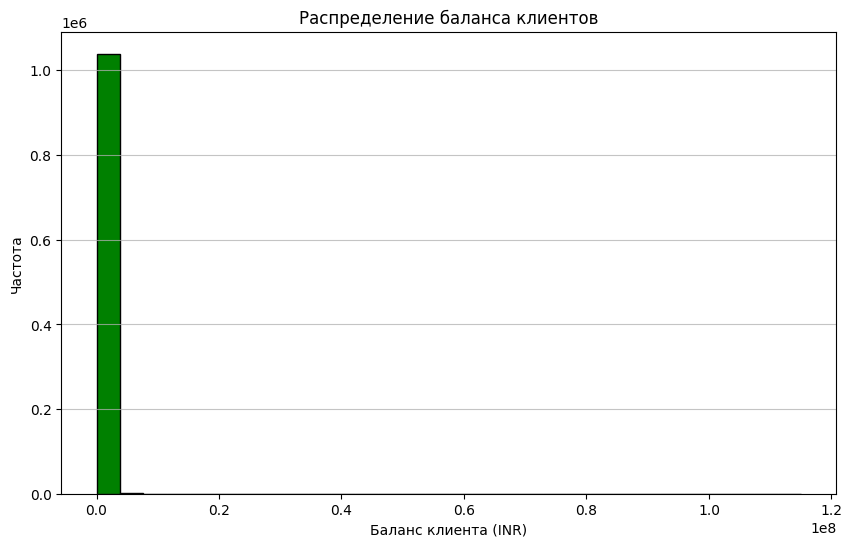

In [ ]:
import matplotlib.pyplot as plt

# Построение гистограммы для 'custaccountbalance'
plt.figure(figsize=(10, 6))  # Размер графика
plt.hist(df['custaccountbalance'], bins=30, color='green', edgecolor='black')  # Построение гистограммы
plt.title('Распределение баланса клиентов')  # Заголовок графика
plt.xlabel('Баланс клиента (INR)')  # Подпись по оси X
plt.ylabel('Частота')  # Подпись по оси Y
plt.grid(axis='y', alpha=0.75)  # Добавление сетки
plt.show()  # Отображение графика

Данные распределены не равномерно: большая часть данных в диапазоне от 0 до 0,1.

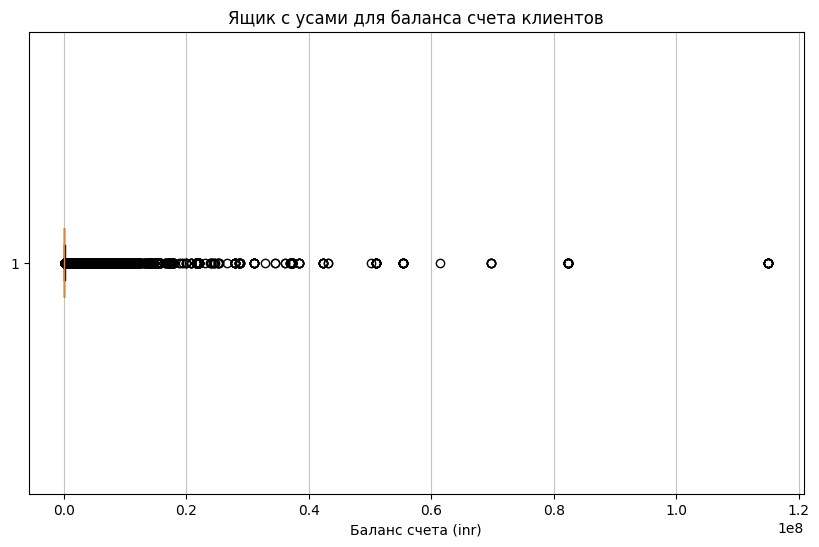

In [ ]:
import matplotlib.pyplot as plt

# Построение ящика с усами
plt.figure(figsize=(10, 6))  # Установка размеров графика
plt.boxplot(df['custaccountbalance'], vert=False, patch_artist=True)  # Построение ящика с усами
plt.title('Ящик с усами для баланса счета клиентов')  # Заголовок графика
plt.xlabel('Баланс счета (inr)')  # Подпись оси X
plt.grid(axis='x', alpha=0.75)  # Добавление сетки по оси X
plt.show()  # Отображение графика

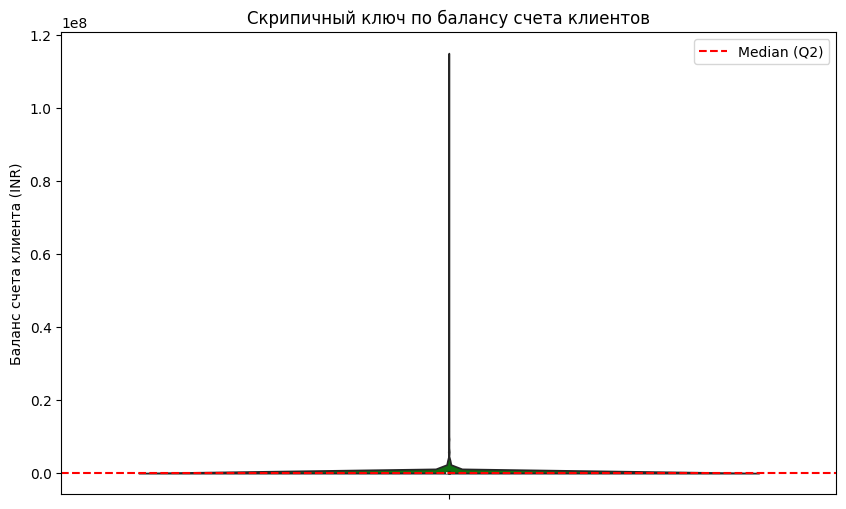

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создание скрипичного ключа
plt.figure(figsize=(10, 6))
sns.violinplot(y='custaccountbalance', data=df, color='green')

# Добавление медианы (Q2)
median_balance = df['custaccountbalance'].median()
plt.axhline(median_balance, color='red', linestyle='--', label='Median (Q2)')

# Настройка графика
plt.title('Скрипичный ключ по балансу счета клиентов')
plt.ylabel('Баланс счета клиента (INR)')
plt.legend()
plt.grid(False)

# Показать график
plt.show()


In [ ]:
df['custaccountbalance'].median()

16768.52

In [ ]:
df['custaccountbalance'].mean()

114998.60528326231

Большая часть значений баланса счета клиентов находится в диапазоне от 4728.14 до 57428.85. Также наблюдается небольшая группа клиентов, баланс счета которых сильно превышает верхнюю границу диапазона.

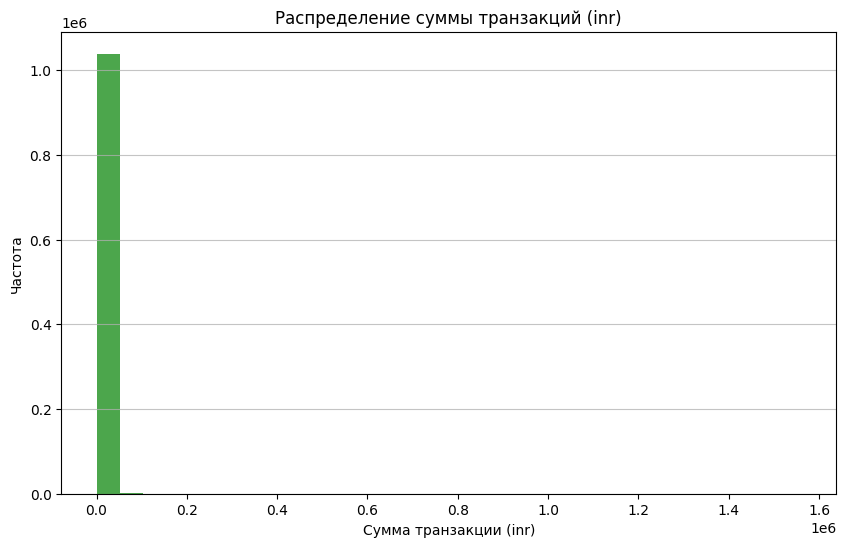

In [ ]:
# Построение гистограммы для transactionamount
plt.figure(figsize=(10, 6))  # Установка размеров графика
plt.hist(df['transactionamount (inr)'], bins=30, color='green', alpha=0.7)  # Построение гистограммы
plt.title('Распределение суммы транзакций (inr)')  # Заголовок графика
plt.xlabel('Сумма транзакции (inr)')  # Подпись оси X
plt.ylabel('Частота')  # Подпись оси Y
plt.grid(axis='y', alpha=0.75)  # Добавление сетки по оси Y
plt.show()  # Отображение графика

Данные распределены не равномерно: большая часть данных в диапазоне от 0 до 0,1.


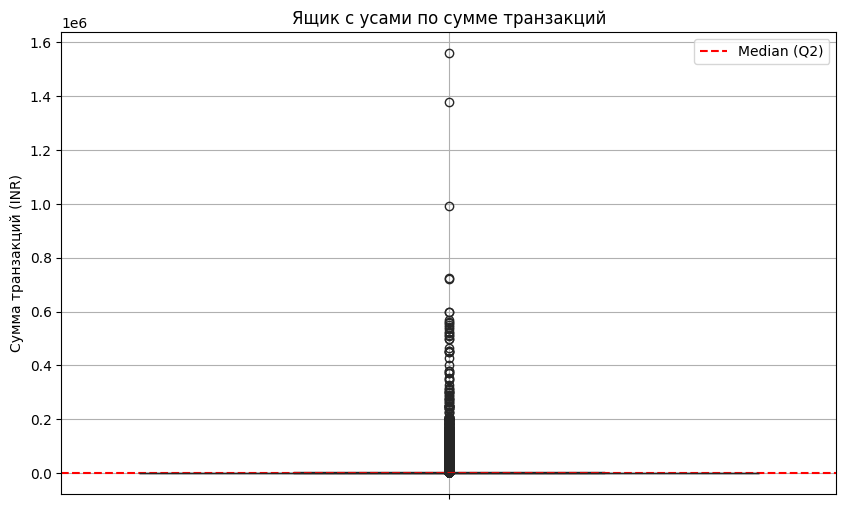

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создание ящика с усами
plt.figure(figsize=(10, 6))
sns.boxplot(y='transactionamount (inr)', data=df, color='green')

# Добавление медианы (Q2)
median_amount = df['transactionamount (inr)'].median()
plt.axhline(median_amount, color='red', linestyle='--', label='Median (Q2)')

# Настройка графика
plt.title('Ящик с усами по сумме транзакций')
plt.ylabel('Сумма транзакций (INR)')
plt.legend()
plt.grid(True)

# Показать график
plt.show()

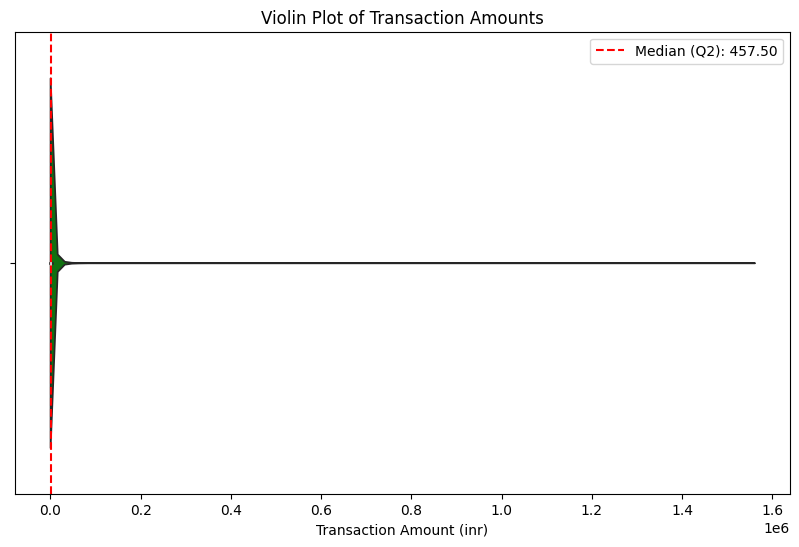

In [ ]:
# Создание скрипичного ключа
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['transactionamount (inr)'], color='green')

# Добавление линии, обозначающей медиану (Q2)
median_value = df['transactionamount (inr)'].median()
plt.axvline(median_value, color='red', linestyle='--', label=f'Median (Q2): {median_value:.2f}')

# Настройка графика
plt.title('Violin Plot of Transaction Amounts')
plt.xlabel('Transaction Amount (inr)')
plt.legend()

# Показать график
plt.show()

In [ ]:
df['transactionamount (inr)'].median()

457.5

In [ ]:
df['transactionamount (inr)'].mean()

1566.0960794689786

Большая часть сумм транзакций находится в диапазоне от 160.00 до 1200.00. Также наблюдается небольшая группа клиентов, суммы транзакций которых сильно превышают верхнюю границу диапазона.

## Возраст клиентов

Возраст клиентов на сегодняшний день

<ipython-input-30-b9ee2ccad334>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customerdob'] = pd.to_datetime(df['customerdob'])
<ipython-input-30-b9ee2ccad334>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = (current_date - df['customerdob']).dt.days // 365
<ipython-input-30-b9ee2ccad334>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

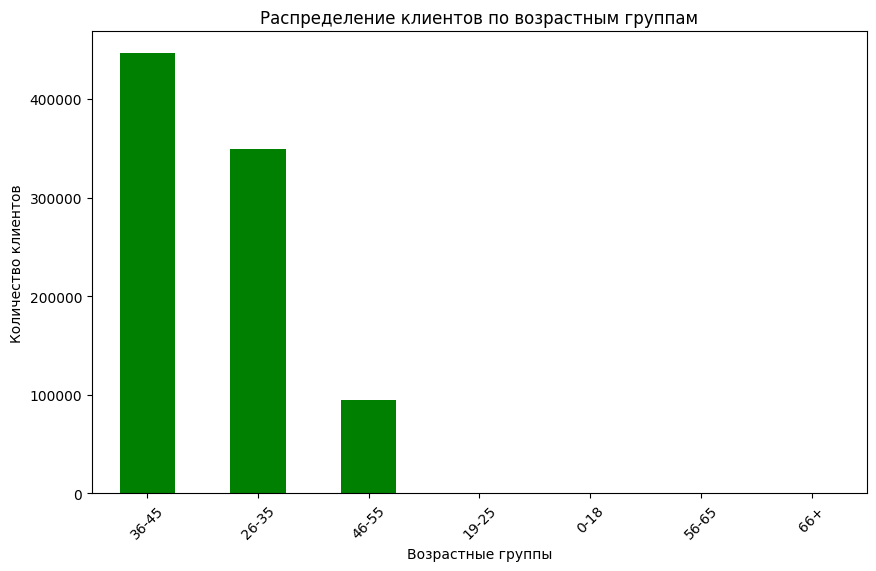

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Преобразуем столбец с датой рождения в datetime
df['customerdob'] = pd.to_datetime(df['customerdob'])

# 2. Вычисляем текущую дату
current_date = datetime.now()

# 3. Рассчитываем возраст клиентов
df['age'] = (current_date - df['customerdob']).dt.days // 365

# 4. Определяем возрастные корзины
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Возрастные группы
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# 5. Считаем количество клиентов в каждой возрастной группе
age_distribution = df['age_group'].value_counts().sort_values(ascending=False)

# 6. Построение гистограммы
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='green')

# 7. Настройка графика
plt.title('Распределение клиентов по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)

# Убираем сетку с графика
plt.grid(False)

# 8. Показать график
plt.show()

Возраст клиентов на момент совершения транзакций

<ipython-input-31-b1859ff4db33>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customerdob'] = pd.to_datetime(df['customerdob'])
<ipython-input-31-b1859ff4db33>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transactiondate'] = pd.to_datetime(df['transactiondate'])
<ipython-input-31-b1859ff4db33>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

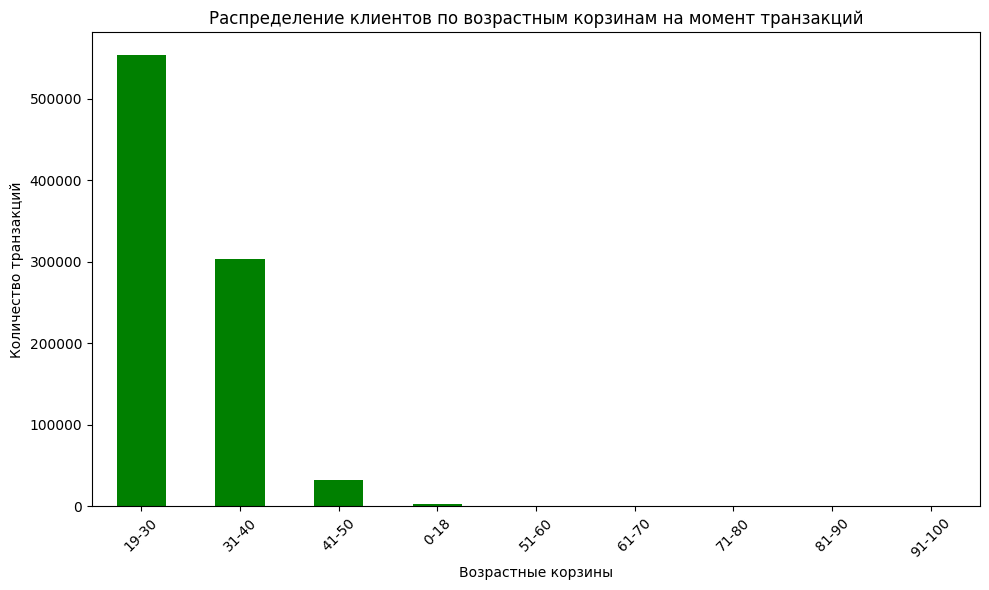

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем столбец 'customerdob' в datetime
df['customerdob'] = pd.to_datetime(df['customerdob'])

# Преобразуем столбец 'transactiondate' в datetime
df['transactiondate'] = pd.to_datetime(df['transactiondate'])

# Вычисляем возраст клиента на момент транзакции
df['age_at_transaction'] = (df['transactiondate'] - df['customerdob']).dt.days // 365

# Определяем корзины для возраста
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['age_bins'] = pd.cut(df['age_at_transaction'], bins=bins, labels=labels, right=False)

# Считаем количество транзакций в каждой корзине и сортируем по убыванию
age_distribution = df['age_bins'].value_counts().sort_values(ascending=False)

# Строим график
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='green')

# Настраиваем график
plt.title('Распределение клиентов по возрастным корзинам на момент транзакций')
plt.xlabel('Возрастные корзины')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)
plt.grid(False)  # Убираем сетку

# Показать график
plt.tight_layout()
plt.show()

Т.к. данные у нас за 2016 год, актально будет посмотреть возраст клиентов на момент совершения транзакций.
Самая большая группа клиентов совершавших транзакции была в возрасте от 19 до 30 лет.
На сегодняшний день это была бы группа в возрасте от 36 до 45 лет.

## Пол клиентов

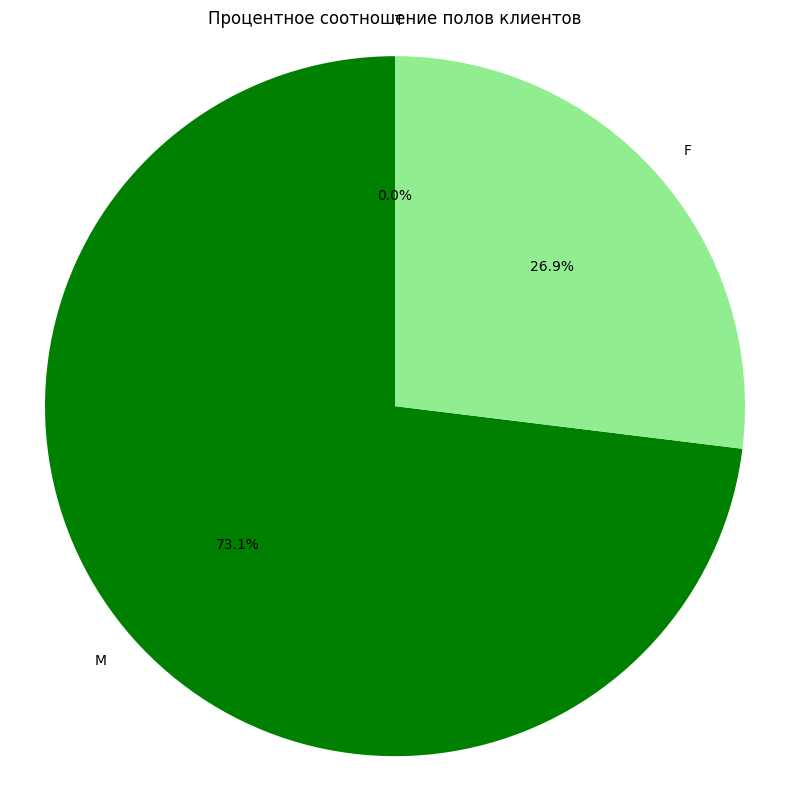

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Считаем количество клиентов по полу
gender_distribution = df['custgender'].value_counts()

# Строим круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['green', 'lightgreen'])

# Настраиваем график
plt.title('Процентное соотношение полов клиентов')
plt.axis('equal')  # Чтобы круговая диаграмма была кругом
plt.grid(False)  # Убираем сетку

# Показать график
plt.tight_layout()
plt.show()

Преобладающее большинство клиентов мужчины 73,1%.

##Место жительства клиентов

In [ ]:
df['custlocation'].nunique()

9275

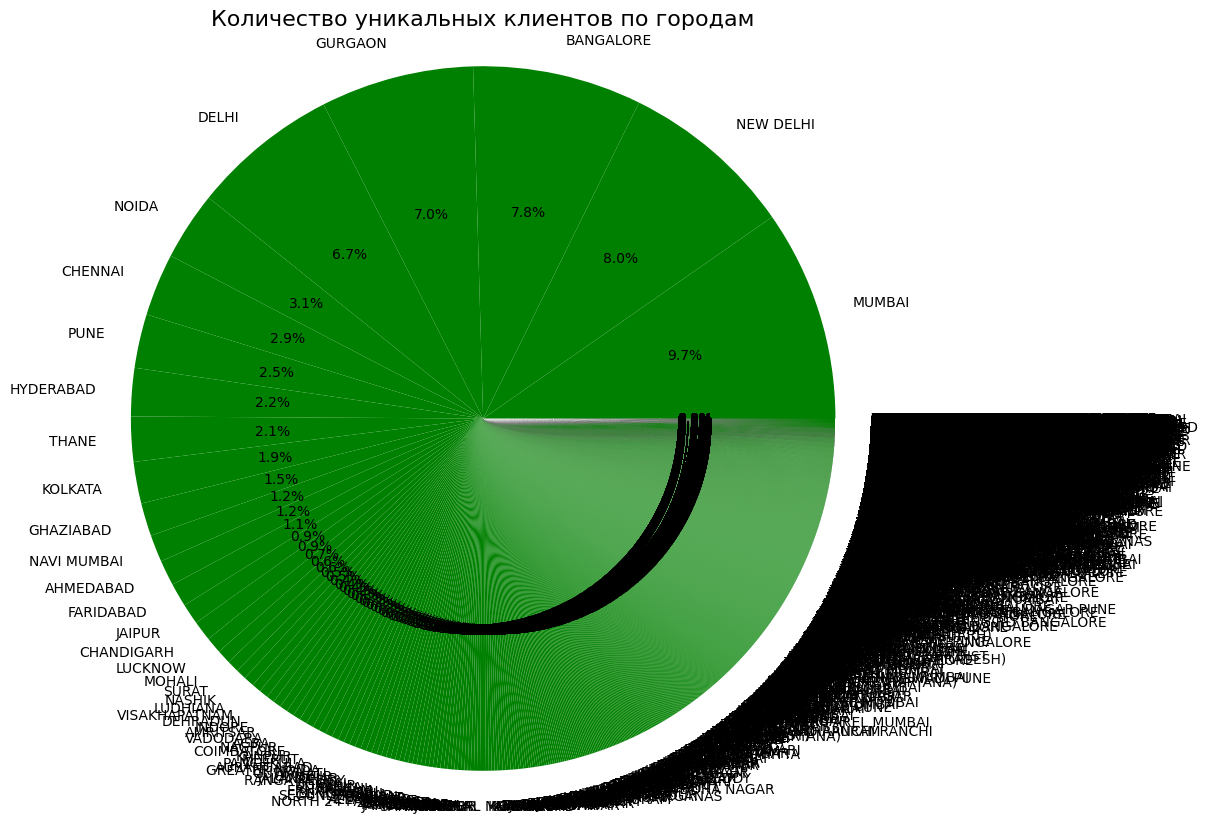

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Подсчитываем количество уникальных клиентов по городам
unique_customers_per_location = df.groupby('custlocation')['customerid'].nunique()

# Сортируем данные по количеству уникальных клиентов в порядке убывания
unique_customers_per_location = unique_customers_per_location.sort_values(ascending=False)

# Создаем круговую диаграмму
plt.figure(figsize=(10, 10))  # Устанавливаем размер графика
plt.pie(unique_customers_per_location, labels=unique_customers_per_location.index,
        autopct='%1.1f%%', colors=['green'] * len(unique_customers_per_location))

# Настраиваем график
plt.title('Количество уникальных клиентов по городам', fontsize=16)
plt.axis('equal')  # Делаем круг равномерным
plt.grid(False)  # Убираем сетку

# Отображаем график
plt.show()

In [ ]:
unique_customers_per_location.reset_index()

,custlocation,customerid
0,MUMBAI,100198
1,NEW DELHI,82811
2,BANGALORE,80128
3,GURGAON,72637
4,DELHI,69611
...,...,...
9270,BARODA-VADODARA,1
9271,BARIGADE ROAD AREA BANGALORE,1
9272,SANTACRUZ (EAST) MUMBAI,1
9273,LAYOUT BOGADHI MYSORE,1


Разброс клиентов по городам большой: у нас 9275 наименовайний. Основная концентрайия клиентов наблюдается в MUMBAI (100198 чел или 9,7% от общего количества клиентов), NEW DELHI (82811 чел. или 8%), BANGALORE (80128 чел, 7,8%), GURGAON (72637 чел, 7%), DELHI (69611 чел, 6,7%).

## Динамика транзакций

Динамика транзакций по дате (в кол-ве TransactionID) - количество транзакций в день.

<ipython-input-47-c280c65b2d0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transactiondate'] = pd.to_datetime(df['transactiondate'])


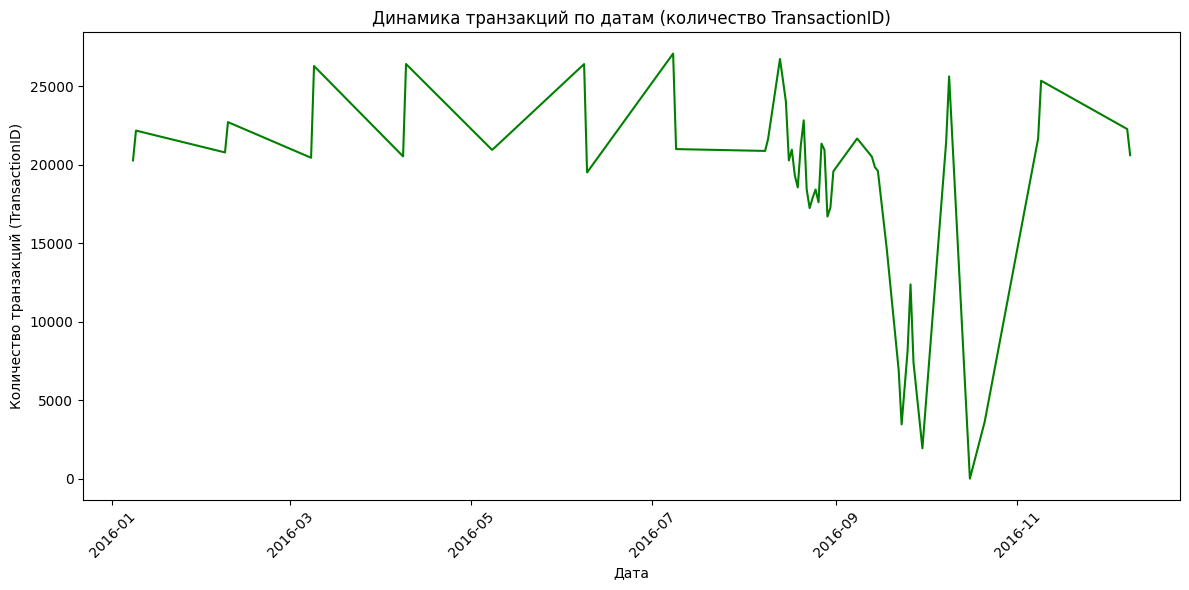

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Убедитесь, что 'transactiondate' имеет тип данных datetime.
df['transactiondate'] = pd.to_datetime(df['transactiondate'])

# Группируем данные по дате и считаем количество транзакций (TransactionID)
daily_transaction_count = df.groupby('transactiondate')['transactionid'].count().reset_index()

# Строим линейный график
plt.figure(figsize=(12, 6))
plt.plot(daily_transaction_count['transactiondate'], daily_transaction_count['transactionid'], color='green')

# Настройки графика
plt.title('Динамика транзакций по датам (количество TransactionID)')
plt.xlabel('Дата')
plt.ylabel('Количество транзакций (TransactionID)')
plt.xticks(rotation=45)
plt.grid(False)  # Убираем сетку

# Отображаем график
plt.tight_layout()
plt.show()

In [ ]:
daily_transaction_count

,transactiondate,transactionid
0,2016-01-08,20277
1,2016-01-09,22179
2,2016-02-08,20787
3,2016-02-09,22718
4,2016-03-08,20446
5,2016-03-09,26292
6,2016-04-08,20535
7,2016-04-09,26420
8,2016-05-08,20949
9,2016-05-09,21116


Промежуток январь-март: чуть больше 20000 транзакций в день.
С марта по июль показатели варьируются от 20000 до 26000 транзакций.
В августе наблюдается спад до 16000 - 17000.
В период с сентября по ноябрь наблюдаются 3 провала близких к нулю, между провалами пик почти до 25000. С середины ноября показатели возвращаются в диапазон 20000-25000 операций.

Динамика транзакций по дате (в сумме TransactionAmount) - сумма транзакций в день

<ipython-input-48-49263e7fa989>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transactiondate'] = pd.to_datetime(df['transactiondate'])


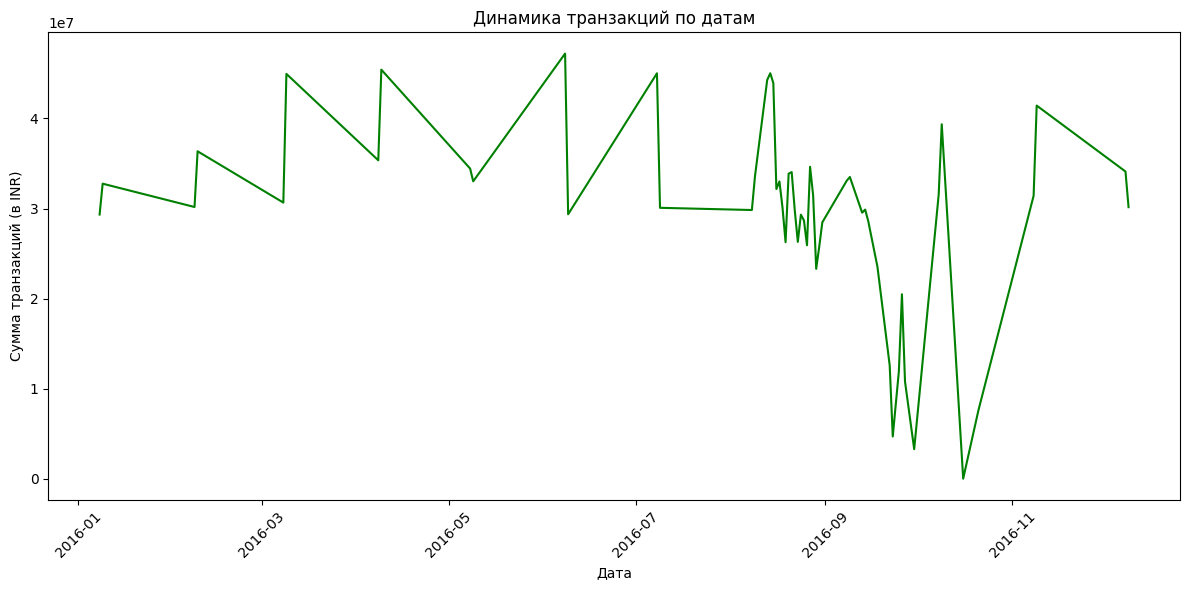

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Убедитесь, что 'transactiondate' имеет тип данных datetime.
df['transactiondate'] = pd.to_datetime(df['transactiondate'])

# Группируем данные по дате и суммируем транзакции
daily_transactions = df.groupby('transactiondate')['transactionamount (inr)'].sum().reset_index()

# Строим линейный график
plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['transactiondate'], daily_transactions['transactionamount (inr)'], color='green')

# Настройки графика
plt.title('Динамика транзакций по датам')
plt.xlabel('Дата')
plt.ylabel('Сумма транзакций (в INR)')
plt.xticks(rotation=45)
plt.grid(False)  # Убираем сетку

# Отображаем график
plt.tight_layout()
plt.show()

In [ ]:
daily_transactions

,transactiondate,transactionamount (inr)
0,2016-01-08,29328167.34
1,2016-01-09,32755971.52
2,2016-02-08,30165998.15
3,2016-02-09,36351348.59
4,2016-03-08,30655826.28
5,2016-03-09,44948673.02
6,2016-04-08,35352319.56
7,2016-04-09,45418050.62
8,2016-05-08,34431417.46
9,2016-05-09,33017456.78


С начала года до августа суммы транзакций варьируются от 3 до 5 ед по графику.
В августе начинается спад, а с сентября по ноябрь наблюдаются 3 провала почти до ноля и один пик до 4 ед. В ноябре показатели возвращаются в диапазон от 3 ед и выше.


Графики повторяют друг друга, мы видим прямую зависимость между количеством и суммой транзакций в день.

##Платежеспособность

Платежеспособность клиентов по возрастным группам.

<ipython-input-52-02b497495538>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customerdob'] = pd.to_datetime(df['customerdob'])
<ipython-input-52-02b497495538>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = (current_date - df['customerdob']).dt.days // 365
<ipython-input-52-02b497495538>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

Самая платежеспособная группа: 31-45 с суммой 912632669.24 INR


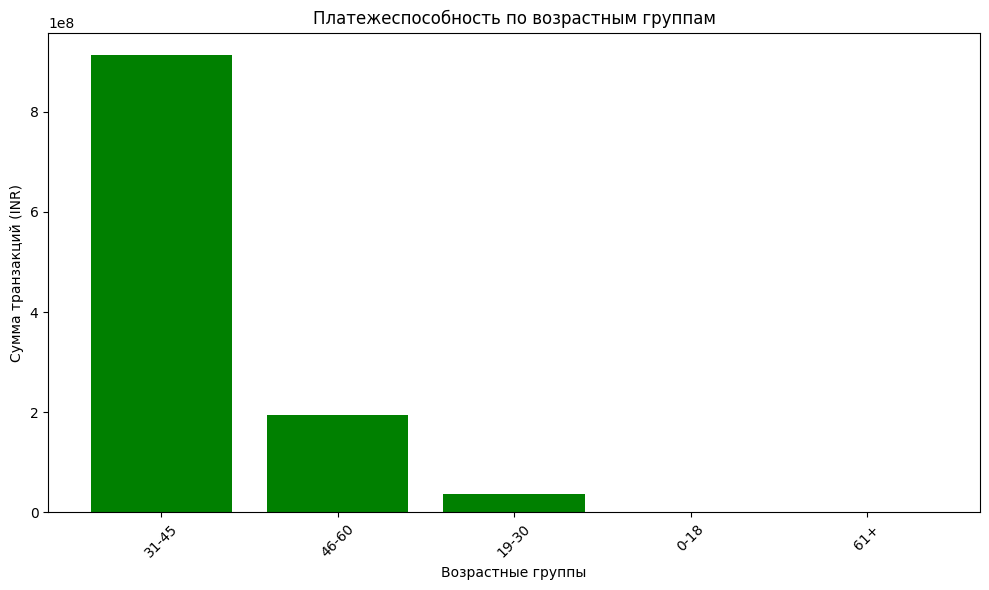

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем 'customerdob' в datetime формат
df['customerdob'] = pd.to_datetime(df['customerdob'])

# Рассчитываем возраст клиентов
current_date = pd.to_datetime('today')
df['age'] = (current_date - df['customerdob']).dt.days // 365

# Определяем корзины по возрасту
bins = [0, 18, 30, 45, 60, 100]  # корзины: 0-18, 19-30, 31-45, 46-60, 61+
labels = ['0-18', '19-30', '31-45', '46-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Группируем по возрастным группам и суммируем транзакционные суммы
age_grouped = df.groupby('age_group')['transactionamount (inr)'].sum().reset_index()

# Сортируем по убыванию
age_grouped = age_grouped.sort_values(by='transactionamount (inr)', ascending=False)

# Определяем самую платежеспособную группу
most_profitable_group = age_grouped.iloc[0]

# Выводим информацию о самой платежеспособной группе
print(f"Самая платежеспособная группа: {most_profitable_group['age_group']} с суммой {most_profitable_group['transactionamount (inr)']} INR")

# Строим график
plt.figure(figsize=(10, 6))
plt.bar(age_grouped['age_group'], age_grouped['transactionamount (inr)'], color='green')
plt.title('Платежеспособность по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Сумма транзакций (INR)')
plt.xticks(rotation=45)
plt.grid(False)  # Убираем сетку
plt.tight_layout()  # Для лучшего отображения
plt.show()

Самые платежеспособные клиенты в вазрасте от 31 до 45 лет.

## Распредление транзакций по локации.

Топ 10 по кол-ву транзакций/сумме транзакций

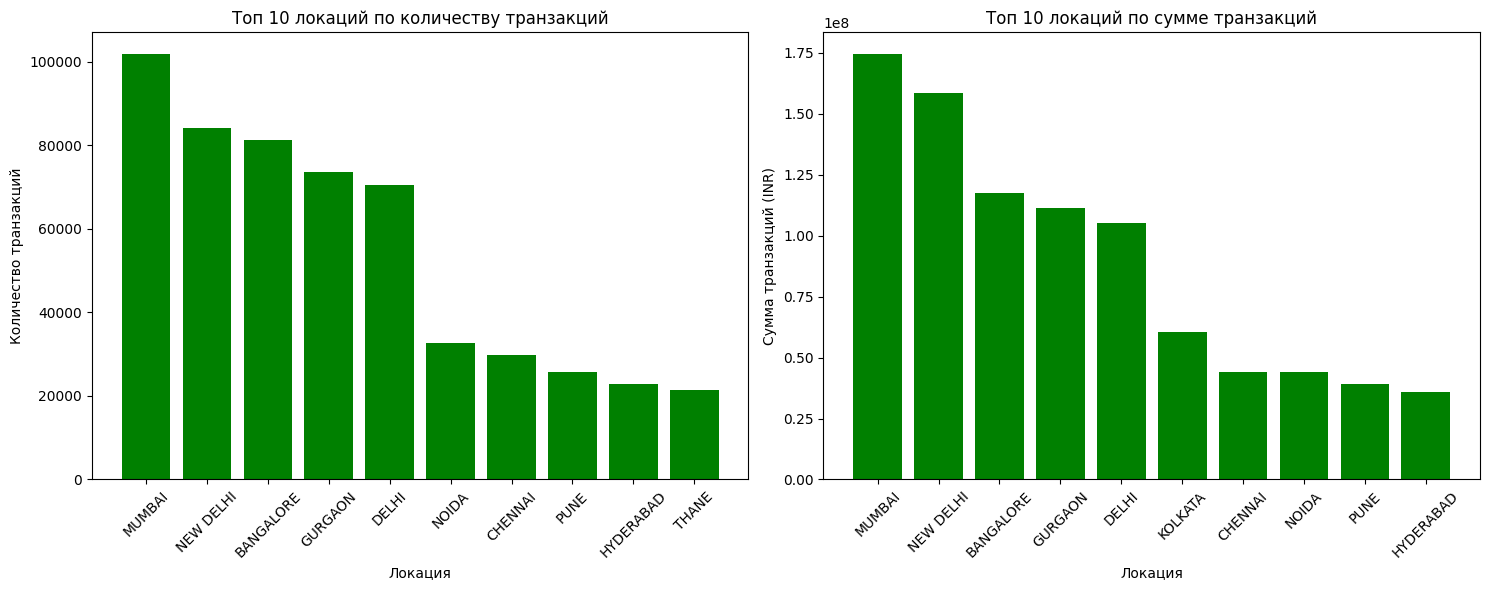

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Группируем данные по локации
transaction_counts = df.groupby('custlocation').size().reset_index(name='transaction_count')
transaction_sums = df.groupby('custlocation')['transactionamount (inr)'].sum().reset_index(name='transaction_sum')

# Объединяем обе таблицы по локации
location_stats = pd.merge(transaction_counts, transaction_sums, on='custlocation')

# Сортируем по количеству транзакций и выбираем топ 10
top_locations_by_count = location_stats.sort_values(by='transaction_count', ascending=False).head(10)
top_locations_by_sum = location_stats.sort_values(by='transaction_sum', ascending=False).head(10)

# Построим графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График по количеству транзакций
ax1.bar(top_locations_by_count['custlocation'], top_locations_by_count['transaction_count'], color='green')
ax1.set_title('Топ 10 локаций по количеству транзакций')
ax1.set_xlabel('Локация')
ax1.set_ylabel('Количество транзакций')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(False)  # Убираем сетку

# График по сумме транзакций
ax2.bar(top_locations_by_sum['custlocation'], top_locations_by_sum['transaction_sum'], color='green')
ax2.set_title('Топ 10 локаций по сумме транзакций')
ax2.set_xlabel('Локация')
ax2.set_ylabel('Сумма транзакций (INR)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(False)  # Убираем сетку

plt.tight_layout()
plt.show()

Первые Топ-5 локаций повторяются в обоих графиках.
Максимальное количество транзакций в MUMBAI: чуть больше 100000, 2-4 позиции на уровне 80000 - 70000, последующие 5 сильно меньше: 35000 - 20000.
По сумме транзакций лидируют MUMBAI (1.75 ед) и NEW DELHI (1.60 ед), следующие три в диапазоне 1.15 - 1.05 ед., последующие 5 от 0.60 до 0.30 ед.


##Распределение времени транзакции (transactiontime)

<ipython-input-54-56043bd5a7f9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transactiontime_minutes'] = df['transactiontime'] / 60000  # 1 минута = 60000 миллисекунд


Среднее время транзакций: 2.62 минут


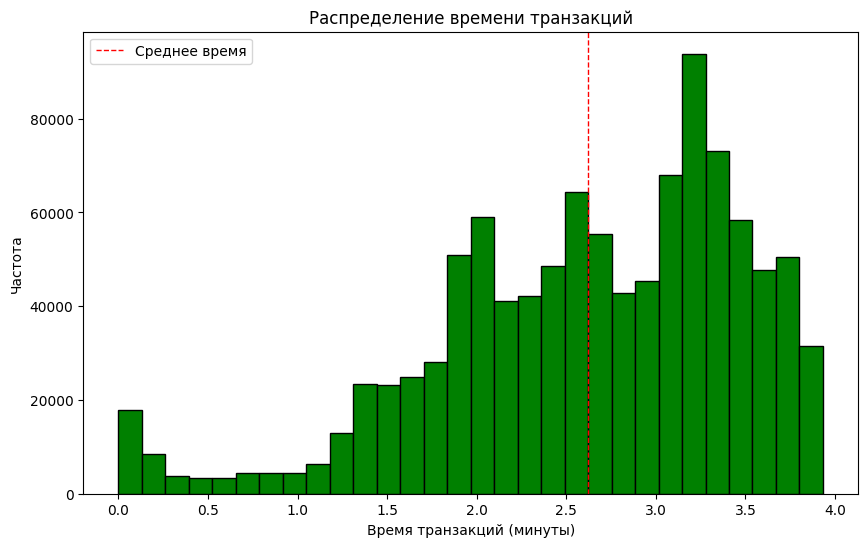

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем время транзакций из миллисекунд в минуты
df['transactiontime_minutes'] = df['transactiontime'] / 60000  # 1 минута = 60000 миллисекунд

# Находим среднее время транзакций
average_transaction_time = df['transactiontime_minutes'].mean()
print(f'Среднее время транзакций: {average_transaction_time:.2f} минут')

# Построим график распределения времени транзакций
plt.figure(figsize=(10, 6))
plt.hist(df['transactiontime_minutes'], bins=30, color='green', edgecolor='black')
plt.title('Распределение времени транзакций')
plt.xlabel('Время транзакций (минуты)')
plt.ylabel('Частота')
plt.grid(False)  # Убираем сетку
plt.axvline(average_transaction_time, color='red', linestyle='dashed', linewidth=1, label='Среднее время')
plt.legend()
plt.show()

Среднее время транзакций: 2.62 минут.
Основная масса транзакций проходит за диапазон времени от 1.9 до 3.8 минут. Пик приходится на промежуток 3.0 - 3.5 минуты.

# Выводы

## 1. В рассматриваемом периоде 879358 уникальных клиентов.

## 2. За рассматриваемый период (2016 год) было совершено 1041614 транзакций.

## 3. Среднее количество транзакций на одного клиента: 1.19.

## 4. Большая часть счетов имеет баланс от 4728.14 до 57428.85. Также наблюдается небольшая группа клиентов, баланс счета которых сильно превышает верхнюю границу диапозона.
Большая часть транзакций проводится на сумму от 160 до 1200.





## 5. Т.к. данные у нас за 2016 год, актуально будет посмотреть возраст клиентов на момент совершения транзакций. Самая большая группа клиентов совершавших транзакции была в возрасте от 19 до 30 лет. На сегодняшний день это была бы группа в возрасте от 36 до 45 лет.

## 6.Преобладающее большинство клиентов мужчины 73,1%.

##7.Разброс клиентов по городам большой: у нас 9275 наименовайний. Основная концентрайия клиентов наблюдается в MUMBAI, NEW DELHI, BANGALORE, GURGAON, DELHI.
Эти же города лидируют по количеству и сумме транзакций.

##8. Динамика транзакций по дате: количество транзакций и сумма транзакций в день.
Начало года относительно стабильно по обоим показателям. В августе начинается спад, с сентября по ноябрь наблюдаются 3 провала почти до ноля, с середины ноября показатели поднимаются на уровень начала года.

Графики повторяют друг друга, мы видим прямую зависимость между количеством и суммой транзакций в день.

##9. Самые платежеспособные клиенты в вазрасте от 31 до 45 лет.

## 10. Среднее время транзакций: 2.62 минут. Основная масса транзакций проходит за диапозон времни от 1.9 до 3.8 минут. Пик приходится на промежуток 3.0 - 3.5 минуты.
